<a href="https://colab.research.google.com/github/danielmlealc/estructuras_01_2024/blob/Taller-%232/Taller_2_Estructuras_de_Datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf

In [ ]:
import time

In [ ]:
def multiplicacion(recurso_disponible):
    with tf.device(recurso_disponible):
        matriz_1 = tf.random.uniform([10000, 10000], dtype=tf.float32)
        matriz_2 = tf.random.uniform([10000, 10000], dtype=tf.float32)

        start_time = time.time()
        calculo = tf.multiply(matriz_1, matriz_2)
        _ = calculo.numpy()
        end_time = time.time()

        print(f"Tiempo de ejecución en {recurso_disponible}: {end_time - start_time:.2f} segundos")

# Llamada a la función para la CPU
multiplicacion("/cpu:0")

# Llamada a la función para la GPU si está disponible
if len(tf.config.list_logical_devices("GPU")):
    multiplicacion("/gpu:0")

# Llamada a la función para la TPU si está disponible
try:
    resolver = tf.distribute.cluster_resolver.TPUClusterResolver(tpu='')
    tf.config.experimental_connect_to_cluster(resolver)
    tf.tpu.experimental.initialize_tpu_system(resolver)
    strategy = tf.distribute.TPUStrategy(resolver)

    with strategy.scope():

        # multiplicacion("/tpu:0")

        # Iniciar contador de tiempo
        start_time = time.time()

        # Código que utiliza la TPU
        matriz_1 = tf.random.uniform([10000, 10000], dtype=tf.float32)
        matriz_2 = tf.random.uniform([10000, 10000], dtype=tf.float32)
        calculo = tf.multiply(matriz_1, matriz_2)
        _ = calculo.numpy()

        # Detener contador de tiempo
        end_time = time.time()

        # Calcular y mostrar tiempo de ejecución
        print(f"Tiempo de ejecución en TPU: {end_time - start_time:.2f} segundos")




except Exception as e:
    print(f"Hay un error con la TPU: {e}")

Tiempo de ejecución en /cpu:0: 1.77 segundos
Tiempo de ejecución en TPU: 1.07 segundos


Tiempo de ejecución con Numpy: 0.01002812385559082
Tiempo de ejecución con listas de Python: 0.0001933574676513672


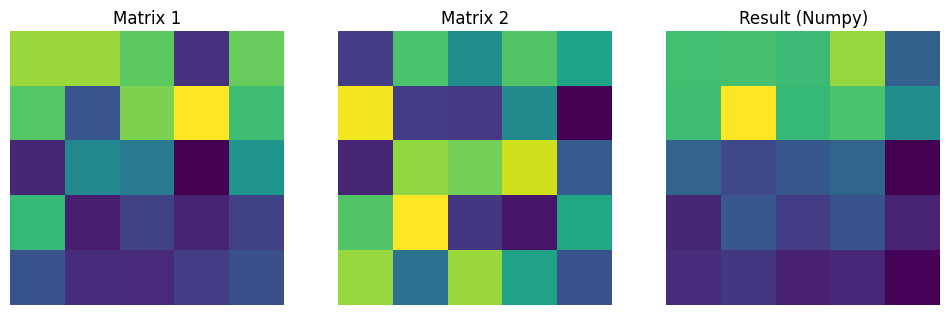

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time

# Dimensiones de las matrices
rows = 5
cols = 5

# Crear matrices aleatorias
matrix1 = np.random.rand(rows, cols)
matrix2 = np.random.rand(rows, cols)

# Multiplicación de matrices utilizando Numpy
start_time = time.time()
result_np = np.dot(matrix1, matrix2)
end_time = time.time()
numpy_time = end_time - start_time
print("Tiempo de ejecución con Numpy:", numpy_time)

# Multiplicación de matrices utilizando listas de Python
def matrix_multiplication(matrix1, matrix2):
    result = [[0 for _ in range(cols)] for _ in range(rows)]
    for i in range(rows):
        for j in range(cols):
            for k in range(cols):
                result[i][j] += matrix1[i][k] * matrix2[k][j]
    return result

start_time = time.time()
result_py = matrix_multiplication(matrix1.tolist(), matrix2.tolist())
end_time = time.time()
python_time = end_time - start_time
print("Tiempo de ejecución con listas de Python:", python_time)

# Visualizar las matrices
fig, ax = plt.subplots(1, 3, figsize=(12, 4))

ax[0].imshow(matrix1, cmap='viridis')
ax[0].set_title('Matrix 1')
ax[0].axis('off')

ax[1].imshow(matrix2, cmap='viridis')
ax[1].set_title('Matrix 2')
ax[1].axis('off')

ax[2].imshow(result_np, cmap='viridis')
ax[2].set_title('Result (Numpy)')
ax[2].axis('off')

plt.show()
